In [1]:
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
# Using Polars libery for reading data faster then pandas
data = pl.read_csv("data_stocks.csv")

In [3]:
data.head()

DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,…,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1491226200,2363.6101,42.33,143.68,129.63,82.04,102.23,85.22,59.76,121.52,38.99,14.61,164.63,888.55,49.85,219.11,39.43,274.08,31.78,81.03,124.89,58.82,77.725,330.73,72.43,37.47,119.385,167.74,33.74,46.645,126.86,59.72,83.54,29.02,28.37,63.49,78.46,…,36.26,124.66,164.62,47.04,106.27,107.65,124.5901,51.62,112.36,89.35,91.13,55.21,66.59,120.13,100.35,65.07,48.73,156.39,60.46,55.7,171.83,73.08,29.62,72.1,52.16,20.34,34.0,84.37,119.035,44.4,39.88,82.03,7.36,50.22,63.86,122.0,53.35
1491226260,2364.1001,42.36,143.7,130.32,82.08,102.14,85.65,59.84,121.48,39.01,14.71,164.68,887.1173,49.94,219.98,39.68,273.99,31.78,81.21,124.99,58.495,77.94,330.73,72.04,37.54,118.81,167.776,33.88,46.61,126.86,59.83,83.94,29.14,28.4,63.46,78.62,…,36.26,124.82,164.39,47.04,106.27,107.65,124.5901,51.58,112.36,89.35,91.21,55.12,66.355,120.13,100.03,65.04,48.752,157.19,59.93,55.81,171.54,72.95,29.64,72.18,52.245,20.32,34.07,84.37,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.77,53.35
1491226320,2362.6799,42.31,143.6901,130.225,82.03,102.2125,85.51,59.795,121.93,38.91,14.64,164.905,887.511,49.86,219.39,39.6,274.275,31.765,81.21,125.0,58.47,77.815,330.73,72.055,37.61,118.83,168.0,33.9,46.885,126.9576,59.905,83.94,29.15,28.375,63.525,78.6311,…,36.19,124.82,165.3,46.98,106.38,107.31,124.71,51.46,112.13,89.16,91.08,55.09,66.2417,120.3368,100.39,65.08,48.72,157.07,60.08,55.64,171.55,72.98,29.67,72.3192,52.2,20.26,34.11,84.585,119.26,44.09,39.98,82.02,7.36,50.12,63.75,121.7,53.365
1491226380,2364.3101,42.37,143.64,130.0729,82.0,102.14,85.4872,59.62,121.44,38.84,14.63,164.76,886.27,49.915,219.3,39.57,273.59,31.83,81.13,124.73,58.42,77.95,330.73,72.14,37.62,118.68,168.2,33.8499,46.7,126.7,59.7,83.7064,29.125,28.35,63.53,78.706,…,36.0,124.82,165.16,46.8097,106.33,107.49,124.4889,51.38,112.01,89.06,91.015,55.21,66.17,120.31,100.39,64.95,48.695,156.945,60.39,55.64,171.26,73.09,29.79,72.43,52.14,20.2,33.97,84.46,119.26,44.25,39.99,82.02,7.35,50.16,63.88,121.7,53.38
1491226440,2364.8501,42.5378,143.66,129.88,82.035,102.06,85.7001,59.62,121.6,38.93,14.67,164.85,886.58,49.915,219.18,39.55,273.54,31.83,81.12,124.83,58.6,78.05,330.73,72.215,37.625,118.935,168.04,33.84,46.8562,126.89,59.5,84.0,29.14,28.41,63.6344,78.585,…,36.01,124.82,165.24,47.02,106.56,107.48,125.2449,51.4347,112.23,89.1,91.0,55.32,66.18,120.36,100.11,64.84,48.63,157.16,60.18,55.68,171.18,72.99,29.71,72.48,52.14,20.22,34.0,84.47,119.61,44.11,39.96,82.03,7.36,50.2,63.91,121.695,53.24


In [4]:
data.corr()

DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,…,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,0.885359,0.519808,0.651512,0.953397,0.10276,0.568293,0.793204,-0.757786,0.605316,0.599153,0.226015,0.704462,0.623954,0.921952,0.84011,-0.940685,0.61697,0.31534,0.988121,0.675687,0.484706,-0.718869,0.78671,0.806765,0.568938,0.791025,-0.733285,-0.688812,0.139733,0.833535,0.927343,-0.820241,-0.857788,-0.878195,-0.335678,-0.492775,…,0.69971,-0.684611,0.976282,0.715595,-0.5781,0.878279,-0.083057,0.578431,0.256448,0.954692,0.709768,0.824334,0.547714,-0.271828,-0.896622,0.437893,-0.039663,0.668245,0.785868,-0.264841,0.030187,0.809834,0.053167,0.684229,0.714874,-0.489085,-0.715221,0.669316,-0.829196,0.833376,0.709542,-0.788489,0.895679,0.965059,0.923129,-0.130091,0.719325
0.885359,1.0,0.712007,0.553332,0.909061,0.219471,0.562785,0.83435,-0.690018,0.450572,0.752814,0.270753,0.708334,0.834878,0.922833,0.909787,-0.863148,0.496588,0.365835,0.852143,0.633818,0.627026,-0.79176,0.624784,0.687518,0.650995,0.697267,-0.591848,-0.581459,0.341802,0.806603,0.921329,-0.590848,-0.667233,-0.690342,0.010504,-0.542219,…,0.789939,-0.549801,0.914201,0.685196,-0.399312,0.798161,-0.091409,0.734577,0.487183,0.852388,0.765897,0.663255,0.51807,0.034687,-0.778416,0.453187,-0.18891,0.757975,0.71362,-0.071637,0.326558,0.718749,0.134651,0.684763,0.870559,-0.34804,-0.48313,0.847975,-0.848511,0.741641,0.820043,-0.517492,0.805525,0.849908,0.915986,0.143752,0.813459
0.519808,0.712007,1.0,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,0.5289,0.803319,0.593574,0.660926,-0.639629,0.096628,0.468258,0.481325,0.404745,0.567155,-0.681113,0.102313,0.211496,0.354914,0.418846,-0.409006,-0.583706,0.662241,0.351587,0.639932,-0.21664,-0.245775,-0.242702,0.436888,-0.720154,…,0.584742,-0.074929,0.558827,0.322093,-0.069222,0.396854,-0.086852,0.523509,0.698371,0.385453,0.717439,0.174225,0.349937,0.382945,-0.267094,0.494899,-0.586295,0.688989,0.211689,0.205066,0.665643,0.275277,0.231421,0.33528,0.836602,-0.409519,-0.166749,0.798624,-0.744085,0.28437,0.810955,-0.07095,0.522341,0.39573,0.642336,0.588241,0.753567
0.651512,0.553332,0.082065,1.0,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,0.131275,0.370111,0.704358,0.671936,-0.531976,0.279693,-0.166888,0.637467,0.133267,0.314661,-0.514152,0.671804,0.546814,0.5864,0.281176,-0.255595,-0.268124,-0.065778,0.511664,0.693353,-0.45438,-0.81571,-0.816333,-0.514896,0.192759,…,0.407405,-0.692608,0.58845,0.43135,-0.413968,0.453659,-0.111117,0.29719,0.068743,0.781096,0.308028,0.559299,0.107434,-0.360217,-0.792875,-0.061758,0.211194,0.388563,0.666012,-0.577962,-0.259964,0.484494,-0.059534,0.761047,0.198634,-0.227968,-0.73951,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.4426
0.953397,0.909061,0.542213,0.714578,1.0,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,0.644373,0.730719,0.961857,0.906947,-0.919636,0.546833,0.36578,0.931362,0.607426,0.584149,-0.751792,0.715841,0.694139,0.636358,0.671714,-0.

In [5]:
data.describe()

describe,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,…,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,…,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0,41266.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.4977e9,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,43.291988,12.624442,167.030297,968.747188,57.683091,238.598238,33.413552,272.95764,32.652696,89.325485,126.92802,64.227338,69.502897,348.719389,73.025271,39.607469,121.375413,165.457076,32.139336,51.284218,127.41666,65.928564,81.014205,26.05103,25.216388,62.413344,…,38.363101,116.967866,181.850786,47.086121,107.603907,109.019095,113.124563,51.863284,119.265065,95.693963,98.311314,57.134291,65.90389,123.767195,89.828376,66.790525,46.574448,176.242257,62.352736,53.587272,181.971118,73.777928,30.102558,77.066819,55.411353,19.272765,33.248472,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
"""std""",3.8222e6,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.25201,2.448582,1.172758,6.91073,38.966684,4.56742,12.824877,3.975551,13.763994,1.178095,5.746178,6.840787,2.634135,3.436516,25.257095,3.230921,1.225993,3.833343,10.024798,0.985571,2.377096,4.927756,4.133884,3.225397,1.976801,2.176216,2.624382,…,1.159465,5.836284,9.608218,1.656671,2.717122,3.275806,5.662877,0.76072,3.242153,4.385522,5.335147,3.563356,1.859369,5.155408,9.226681,2.005502,1.767864,8.983449,1.540708,1.28905,9.512629,1.464602,0.927709,2.524082,2.424774,0.362162,0.908009,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.60707,3.346887
"""min""",1.4912e9,2329.1399,40.83,140.16,128.24,74.8,95.87,83.0,44.65,96.25,37.46,9.871,152.3,884.67,48.41,208.56,28.02,244.28,30.46,80.0,113.7716,58.21,63.51,312.66,68.5,37.025,114.84,150.0,30.365,46.1015,119.54,57.53,74.11,22.11,20.825,56.09,…,35.46,105.01,164.39,43.55,101.08,102.14,100.735,49.56,111.29,88.165,87.61,51.23,60.92,111.78,73.03,61.51,42.8,154.26,59.63,50.845,164.82,70.09,27.69,71.385,49.23,18.42,30.97,83.41,89.51,44.09,39.12,76.06,6.66,48.82,63.18,110.12,52.3
"""max""",1.5042e9,2490.6499,54.475,164.51,155.33,90.44,121.77,119.27,62.56,142.875,47.83,15.65,182.57,1082.5699,66.5,259.2,40.7

In [6]:
data.shape

(41266, 502)

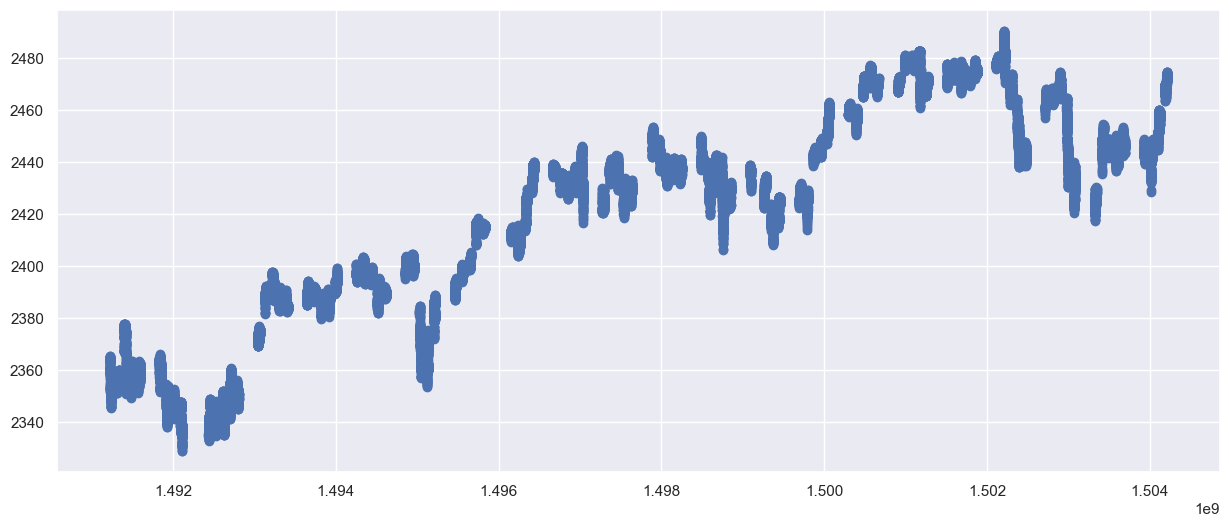

In [7]:
plt.scatter(data[:,0],data[:,1])

In [8]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [9]:
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

In [10]:
wcss

[1.488219026159794e+17,
 6.577124987132774e+16,
 3.842389899739983e+16,
 2.3249622761486424e+16,
 1.6794063997289404e+16,
 1.2078523461638344e+16,
 8908495165106225.0,
 7159337743798417.0,
 5526779121222989.0]

In [11]:
knee =KneeLocator(range(2,11),wcss,curve="convex",direction="decreasing")

In [12]:
knee.elbow

4

In [13]:
kmeans = KMeans(n_clusters=4,init="k-means++")

In [14]:
ylables = kmeans.fit_predict(data)
print(ylables)

[0 0 0 ... 3 3 3]


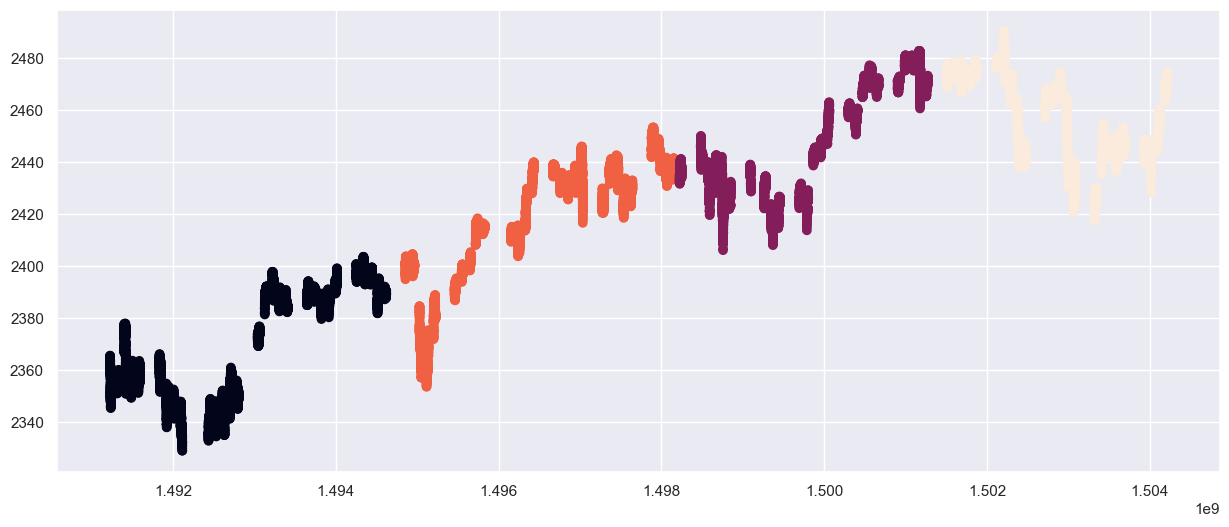

In [15]:
plt.scatter(data[:,0],data[:,1],c=ylables)

In [16]:
# applying DBSCAN now
dbscan = DBSCAN(eps=0.5,min_samples=5)
ylables = dbscan.fit_predict(data)

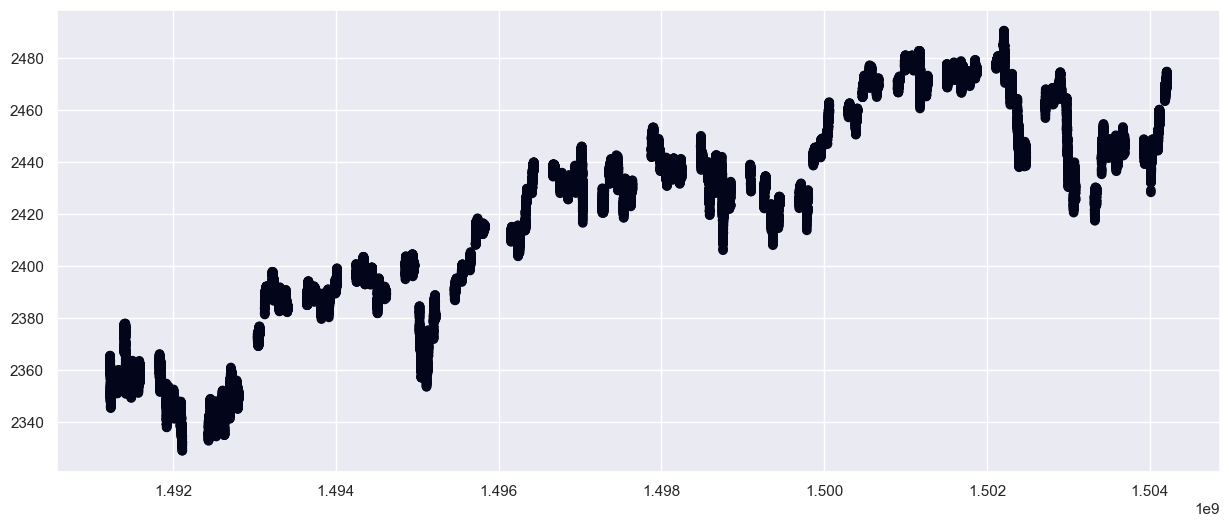

In [17]:
plt.scatter(data[:,0],data[:,1],c=ylables)